# Expected error probabilities of the classical maximum a posteriori strategies

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb, binom

In [49]:
# box and measurement parameters
N = 1 # half number of photons per box
n = np.arange(2*N+1)
alpha = -np.pi/8

In [38]:
def likelihood( n , N = 1 , alpha = 0., box = "A"):

    P = np.zeros_like(n, dtype="float64")
    
    if box == "C":
        P += np.power(2.,-2*N)*comb(2*N , n)
    else:
        if box == "A": p = np.cos(np.pi/8 + alpha)**2
        elif box == "B": p = np.cos(np.pi/8 - alpha)**2
        
        q = 1 - p
        
        kmin = np.maximum(0, n-N)
        kmax = np.minimum(n, N)
        
        for j in range(len(n)):
            for k in range(kmin[j],kmax[j] + 1):
                P[j] += comb(N , k)*comb(N, n[j] - k)*np.power(p, N - n[j] + 2*k)*np.power(q, N + n[j] - 2*k)
    
    return P

def EEP( LHA, LHB, LHC ): # expected error probability
    
    # inferring events when the maximum likelihood is well defined
    Ainfer_event = (LHA>LHB)*(LHA>LHC)
    Binfer_event = (LHB>LHA)*(LHB>LHC)
    Cinfer_event = (LHC>LHA)*(LHC>LHB)
    
    ABcoincidence = (LHA==LHB)*(LHA>LHC)
    ACcoincidence = (LHA==LHC)*(LHA>LHB)
    BCcoincidence = (LHB==LHC)*(LHB>LHA)
    
    ABCcoincidence = (LHA==LHB)*(LHA==LHC)
    
    # EXPECTED CONDITIONAL SUCCESS PROBABILITIES
    ESPA = LHA[Ainfer_event].sum() # when the maximum likelihood is evidently A, infer A correctly
    ESPA += LHA[ABcoincidence].sum()/2+LHA[ACcoincidence].sum()/2. # when two likelihoods are equal, throw a dice
    ESPA += LHA[ABCcoincidence].sum()/3 # when the three likelihoods are equal, throw a three sided dice
    
    ESPB = LHB[Binfer_event].sum() # when the maximum likelihood is evidently B, infer B correctly
    ESPB += LHB[ABcoincidence].sum()/2+LHB[BCcoincidence].sum()/2. # when two likelihoods are equal, throw a dice
    ESPB += LHB[ABCcoincidence].sum()/3 # when the three likelihoods are equal, throw a three sided dice
    
    ESPC = LHC[Cinfer_event].sum() # when the maximum likelihood is evidently C, infer C correctly
    ESPC += LHC[ACcoincidence].sum()/2+LHC[BCcoincidence].sum()/2. # when two likelihoods are equal, throw a dice
    ESPC += LHC[ABCcoincidence].sum()/3 # when the three likelihoods are equal, throw a three sided dice
    
    EEP_dict = {
        "A": 1 - ESPA,
        "B": 1 - ESPB,
        "C": 1 - ESPC,
        "Overall": 1 - (ESPA+ESPB+ESPC)/3.
    }
    
    return EEP_dict

In [50]:
LHA = likelihood( n , N, alpha, box="A")
LHB = likelihood( n , N, alpha, box="B")
LHC = likelihood( n , N, alpha, box="C")

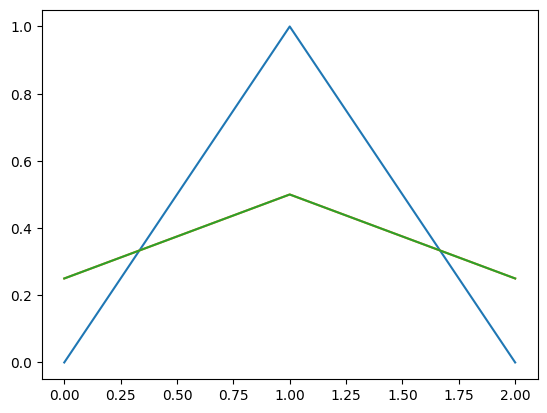

In [51]:
plt.plot(n , LHA)
plt.plot(n , LHB)
plt.plot(n , LHC)

In [52]:
EEP(LHA,LHB,LHC)

{'A': 0.0, 'B': 0.75, 'C': 0.75, 'Overall': 0.5}

# For varying values of theta, fixed N

In [46]:
n_theta = 101
theta_range = np.linspace(-np.pi/8, np.pi/8, n_theta)
N = 500
n = np.arange(2*N+1)

EEPs = np.zeros((n_theta,4), dtype="object")

for j in range(n_theta):
    LHA = np.round(likelihood( n , N, theta_range[j], box="A"), 12)
    LHB = np.round(likelihood( n , N, theta_range[j], box="B"), 12)
    LHC = np.round(likelihood( n , N, theta_range[j], box="C"), 12)
    
    EEPs[j] = np.array(list(EEP(LHA,LHB,LHC).values()))
    
np.save("EEP3BPvsTheta_N{:d}.npy".format(2*N), EEPs)

# For varying values of N, fixed theta

In [45]:
theta = 0
N = np.concatenate( [np.arange(50+1),np.arange(50,510,10)] )

for j in range(len(N)):
    print(N[j])
    n = np.arange(2*N[j]+1)
    LHA = np.round(likelihood( n , N[j] , theta , "A"), 12)
    LHB = np.round(likelihood( n , N[j] , theta , "B"), 12)
    LHC = np.round(likelihood( n , N[j] , theta , "C"), 12)
    
    EEPs = np.array(list(EEP(LHA,LHB,LHC).values()))
    np.save("3BPClassicalMAPEEP_theta{:.3f}_N{:d}.npy".format(theta, 2*N[j]), EEPs)
    
#np.save("3BPClarkeMAPEEP_Nmax{:d}.npy".format(2*Nmax), EEPs)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
